<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module1/regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression: part 1

- linear regression

- ridge regression


$y$ is the dependent variable or response. $x_j$ is the independent variable or feature.

We have the training data $(\mathbf{x}^{(i)}, y^{(i)})_{i=1}^N$.

Linear regression is extremely useful both conceptually and practically.

## Linear regression
### Overview

- It assumes the dependence of outcome $y$ on input $x_1, x_2, \dots, x_d$ is linear.

- The model of the following form, $p(y|\mathbf{x}, \theta)=\mathcal{N}(y|\mathbf{w}^\top \mathbf{x}, \sigma^2)$, where $\theta=(\mathbf{w},\sigma^2)$ are all the parameter of the model. We usually assume $\mathbf{x}=[1, x_1, x_2, \dots, x_d]$, so we can absorb the intercept term $w_0$.

- $\epsilon_i = y^{(i)}-(\mathbf{w}^\top\mathbf{x}^{(i)})$ is the residual error for the $i$-th sample, which assumes follows the Gaussian distribution with mean 0 and variance $\sigma^2$.

- In general a straight line will not provide a good fit to most datasets. We can apply a nonlinear transformation to the input features, by replacing $\mathbf{x}$ with $\phi(\mathbf{x})$ to get
$$p(y|\mathbf{x}, \theta) = \mathcal{N}(y|\mathbf{w}^\top \phi(\mathbf{x}), \sigma^2) $$
As long as $\phi$ is fixed, the model remains linear in the parameter. One possible choice is to use a polynomial expansion of degree $m$.

### Least square estimation

- $\frac{1}{2}\sum\epsilon_i^2=\frac{1}{2}\|\mathbf{\epsilon}\|_2^2$ is the residue sum of squares (RSS).
$$\text{RSS}(\mathbf{w})=\frac{1}{2}\sum_{i=1}^N (y^{(i)}-\mathbf{w}^\top \mathbf{x}^{(i)})^2=\frac{1}{2}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2 = \frac{1}{2}(\mathbf{X}\mathbf{w}-\mathbf{y})^\top(\mathbf{X}\mathbf{w}-\mathbf{y}) $$
In regression, $N\gg d+1$ so usually $\text{rank}(\mathbf{X})=d+1$ is of full rank.

- The gradient is
$ \nabla \text{RSS}(\mathbf{w})=\mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y}$. So to solve
$$\mathbf{X}^\top\mathbf{X} \mathbf{w}=\mathbf{X}^\top\mathbf{y} $$
The ordinary least square solution is $\hat{\mathbf{w}}= (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$.

- If $\mathbf{X}$ is full rank, the hessian of RSS$(\mathbf{w})$ is $\mathbf{X}^\top\mathbf{X}$ is PD. The least square solution is unique.

- The quantity $\mathbf{X}^\dagger = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top$ is the left pseudo inverse of the non-square matrix $\mathbf{X}$.





### Geometric interpretation
The projection matrix Proj$(\mathbf{X})=\mathbf{X}(\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top$. The projective value of $\mathbf{y}$ is given by
$$ \hat{\mathbf{y}} = \mathbf{X} \mathbf{w} = \text{Proj}(\mathbf{X})\mathbf{y}$$

Note $\mathbf{X}^\top (\mathbf{y}-\hat{\mathbf{y}})=0$, so the residual vector to be orthogonal to the span$(\mathbf{X})$.

In [ ]:
%pylab inline
from IPython.display import Image

Image(url='https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/11.3.png?raw=true', width=600)

Populating the interactive namespace from numpy and matplotlib


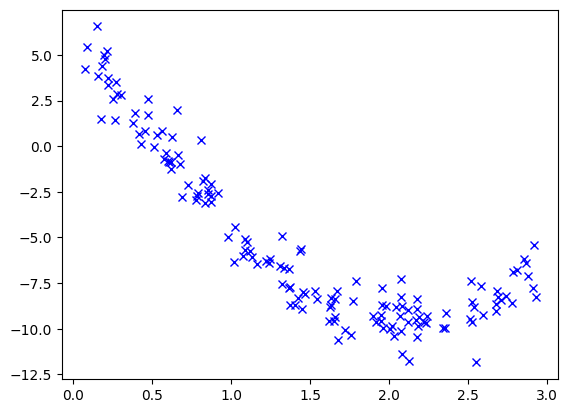

In [ ]:
random.seed(3)

# generate sample with error
x = 3 * random.rand(150) # between 0 and 3
e = 1 * random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*cos(x+1) + e;  plot(x,y,'bx');

[ 1.82913894 -4.8490166 ]
[ 1.82913894 -4.8490166 ]
[ 1.82913894 -4.8490166 ]


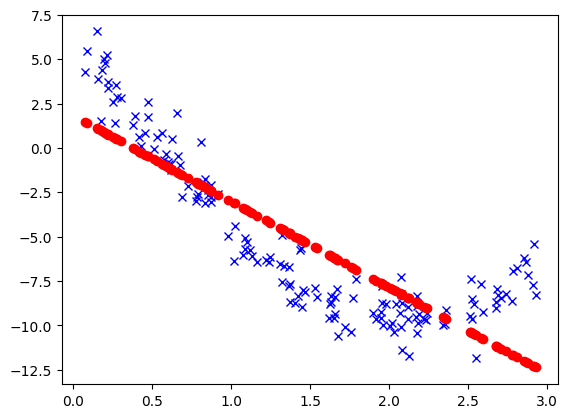

In [ ]:
# linear model f(x) = w0 + w1 x
X = np.ones((x.size,2));
X[:,1] = x


# Bad, unstable
Xpinv = inv(X.T.dot(X)).dot(X.T)
w = Xpinv.dot(y)
print(w)


# Better(use pseudo inverse )
Xpinv = linalg.pinv(X)
w = Xpinv.dot(y)
print(w)
H = X.dot(Xpinv) # projection matrix
yHat = H.dot(y)


# Best (use qr), most stable
q, r = linalg.qr(X);
w    = linalg.solve(r, q.T.dot(y))
print(w)
yHat = X.dot(w)
y_residue1 = y - yHat
plot(x,y,'bx');
plot(x,yHat,'ro');

In [ ]:
def RSS(y_residue):
  return 1/2 * np.sum(y_residue**2)

print(RSS(y_residue1))

449.33722454868496


[  7.27787358 -15.50585108   3.60124671]
79.69345760696496


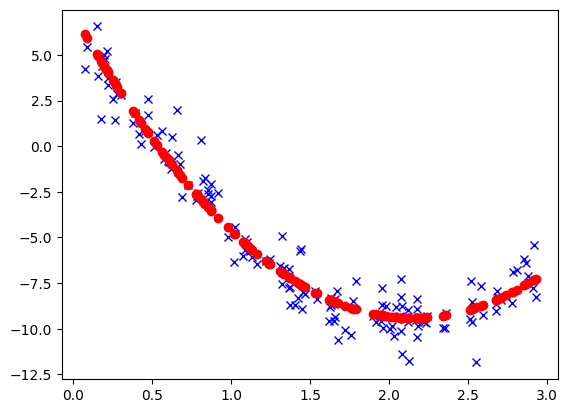

In [ ]:
# linear model f(x) = w0 + w1 x + w2 * x^2
X2 = np.ones((x.size,3));
X2[:,1] = x # partials wrt. w1
X2[:,2] = x**2 # wrt. w2

H2 = dot(X2,linalg.pinv(X2))
yHatQ2 = dot(H2,y)

# Best (use qr), most stable
q, r = linalg.qr(X2);
w2    = linalg.solve(r, q.T.dot(y))
print(w2)


y_residue2 = y - yHatQ2;
plot(x,y,'bx'); plot(x,yHatQ2,'ro');

print(RSS(y_residue2))

0.7261396694981715
0.9514287367110574


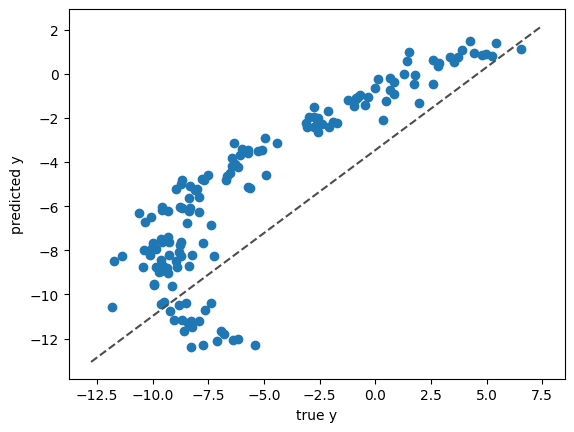

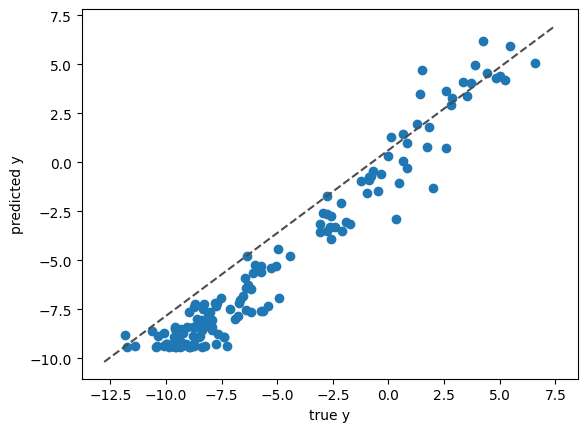

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y,yHat)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel('true y')
ax.set_ylabel('predicted y')

fig, ax = plt.subplots()
ax.scatter(y,yHatQ2)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel('true y')
ax.set_ylabel('predicted y')


import sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y,yHat))
print(r2_score(y,yHatQ2))


[ 5.76112883 -8.85540419 -3.85339672  3.02840937 -0.40449892]


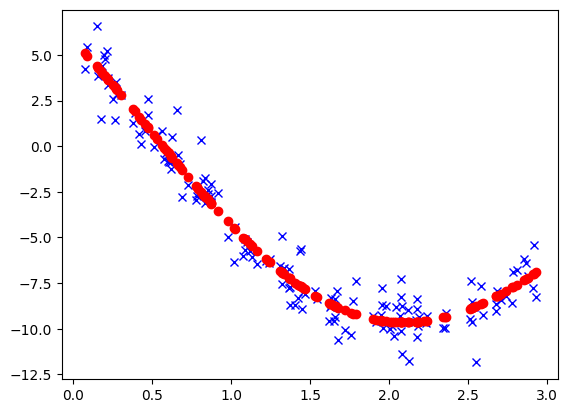

In [ ]:
# Let's try to "overfitting"
# linear model f(x) = w0 + w1 x + w2 * x^2 + w3 * x^3 + w4 * x^4
X4 = np.ones((x.size,5));
X4[:,1] = x # partials wrt. w1
X4[:,2] = x**2 # wrt. w2
X4[:,3] = x**3 # wrt. w3
X4[:,4] = x**4 # wrt. w4


H4 = dot(X4,linalg.pinv(X4))
yHatQ4 = dot(H4,y)
y_residue4 = y - yHatQ4;
plot(x,y,'bx'); plot(x,yHatQ4,'ro');

# lets look at these coeffifients
q, r = linalg.qr(X4);
w4    = linalg.solve(r, q.T.dot(y))
print(w4)

In [ ]:
print('RSS')
print('First order:',  RSS(y_residue1))
print('Second order:', RSS(y_residue2))
print('Fourth order:', RSS(y_residue4),'\n')


print('r2_score')
print('First order:',r2_score(y,yHat))
print('Second order:',r2_score(y,yHatQ2))
print('Fourth order:',r2_score(y,yHatQ4),'\n')

print('coefficients')
print('First order:', w)
print('Second order:', w2)
print('Fourth order:', w4)

RSS
First order: 449.33722454868496
Second order: 79.69345760696496
Fourth order: 72.68499533402228 

r2_score
First order: 0.7261396694981715
Second order: 0.9514287367110574
Fourth order: 0.9557002274523497 

coefficients
First order: [ 1.82913894 -4.8490166 ]
Second order: [  7.27787358 -15.50585108   3.60124671]
Fourth order: [ 5.76112883 -8.85540419 -3.85339672  3.02840937 -0.40449892]


In [ ]:
random.seed(5)
# let's do some test/validation
x_test = 1 * random.rand(40)+3 # between 3 and 4
e = 1 * random.randn(x_test.size) # noise
y_test = 10*cos(x_test+1) + e;


X_test = np.ones((x_test.size,2));
X_test[:,1] = x_test

X2_test = np.ones((x_test.size,3));
X2_test[:,1] = x_test # partials wrt. w1
X2_test[:,2] = x_test**2 # wrt. w2

X4_test = np.ones((x_test.size,5));
X4_test[:,1] = x_test # partials wrt. w1
X4_test[:,2] = x_test**2 # wrt. w2
X4_test[:,3] = x_test**3 # wrt. w3
X4_test[:,4] = x_test**4 # wrt. w4

yHat1_test = X_test.dot(w)
yHat2_test = X2_test.dot(w2)
yHat4_test = X4_test.dot(w4)

print('First order:', RSS(y_test - yHat1_test ))
print('Second order:', RSS(y_test - yHat2_test))
print('Fourth order:', RSS(y_test - yHat4_test),'\n')


First order: 3562.4118909686104
Second order: 25.962102208003945
Fourth order: 83.48756698498413 



## Ridge regression

The polynomial regression with too high of a degree may have overfitting issue. One solution is to reduced the degree of the polynomial. However, a more general solution is to penalize the magnitude of the regression coefficients. We will use the following Ridge regression (Tikhonov regularization), the loss function is
$$\text{LOSS}(\mathbf{w})=\frac{1}{2}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 +\frac{1}{2}\lambda \|\mathbf{w}\|_2^2  $$
where $\lambda>0$ is pre-determined penalty parameter.

- $\lambda=0$, reduce to least square. $\lambda=+\infty$,  $w=0$.

- The gradient is $\nabla\text{LOSS}(\mathbf{w})= \mathbf{X}^\top\mathbf{X} \mathbf{w}-\mathbf{X}^\top\mathbf{y}+\lambda \mathbf{w} $

- $\hat{\mathbf{w}}=(\mathbf{X}^\top\mathbf{X}+\lambda \mathbf{I}_d)^{-1}\mathbf{X}^\top \mathbf{y}$, Note $\mathbf{X}^\top\mathbf{X}+\lambda \mathbf{I}_d$ is PD.

- $\tilde{\mathbf{X}}=\begin{bmatrix} \mathbf{X} \\ \sqrt\Lambda \end{bmatrix}$ and $\tilde{\mathbf{y}}= \begin{bmatrix} \mathbf{y} \\ 0 \end{bmatrix}$, where $\sqrt{\Lambda}$ is a diaginal matrix with $\sqrt{\lambda}$.
In fact, $\hat{\mathbf{w}}= (\tilde{\mathbf{X}}^\top \tilde{\mathbf{X}})^{-1}\tilde{\mathbf{X}}^\top \tilde{\mathbf{y}} $.



(155, 5)
[ 4.37224016 -6.16350626 -4.07947372  2.09779051 -0.1408393 ]
Fourth order with Ridge: 425.0414998046425


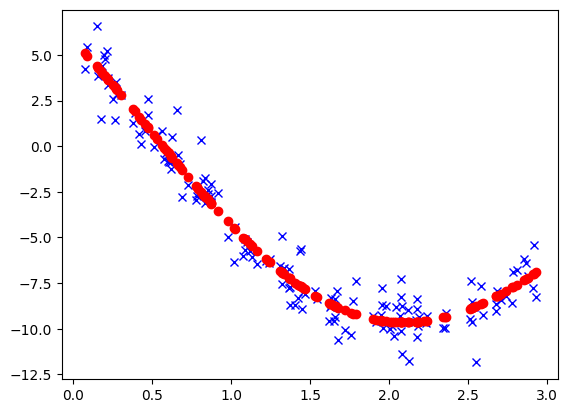

In [ ]:
# it is bad idea to use the matrix inversion
# We can turn this problem into a regression problem previously solved.
l = 1; # lambda=1
sq_Lambda = diag(ones(5)*sqrt(l))

X4_tilde = np.vstack([X4, sq_Lambda])
y_tilde  = append(y, zeros(5))

print(X4_tilde.shape)

# use the least square result
H4_tilde = dot(X4_tilde,linalg.pinv(X4_tilde))
yHatQ4_tilde = dot(H4_tilde,y_tilde)

plot(x,y,'bx'); plot(x,yHatQ4[0:y.size],'ro');


q, r = linalg.qr(X4_tilde);
w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
print(w4_tilde)

yHat4_tilde_test = X4_test.dot(w4_tilde)
print('Fourth order with Ridge:', RSS(y_test - yHat4_tilde_test))

# this RSS tells lambda=1 cannot eliminate the overfitting

# verify with the matrix inverse (you should not use this method)
#Xpinv = inv(X4.T.dot(X4)+diag(ones(5)*l)).dot(X4.T)
#w = Xpinv.dot(y)
#print(w)




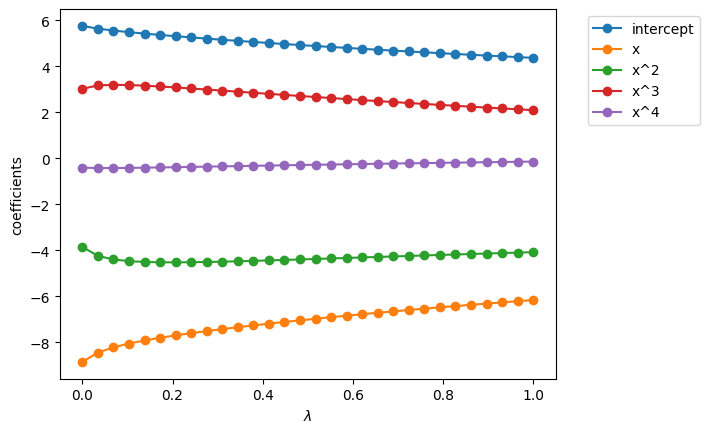

In [ ]:
# how does these coefficient behave with the choice of lambda
# regularization path
l_span   = linspace(0,1,30) #lambda=0, goes to least square
w4_store = zeros((30, 5))
error_store = zeros(30)

for index in range(len(l_span)):
  l         = l_span[index]
  sq_Lambda = diag(ones(5)*sqrt(l))
  X4_tilde  = np.vstack([X4, sq_Lambda])
  y_tilde   = append(y, zeros(5))
  q, r       = linalg.qr(X4_tilde);
  w4_tilde    = linalg.solve(r, q.T.dot(y_tilde))
  w4_store[index,:] = w4_tilde
  yHat4_tilde_test = X4_test.dot(w4_tilde)
  error_store[index] = RSS(y_test - yHat4_tilde_test)

# regularization path plot
fig, ax = plt.subplots()
ax.plot(l_span, w4_store[:,0],'-o',label='intercept')
ax.plot(l_span, w4_store[:,1],'-o',label='x')
ax.plot(l_span, w4_store[:,2],'-o',label='x^2')
ax.plot(l_span, w4_store[:,3],'-o',label='x^3')
ax.plot(l_span, w4_store[:,4],'-o',label='x^4')
leg = ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
ylabel('coefficients')
xlabel(r'$\lambda$');

min of RSS in λ is 16.249272874522465
optimal λ is  0.3103448275862069
[ 5.15931691 -7.42809146 -4.49366941  2.94762701 -0.34829546]


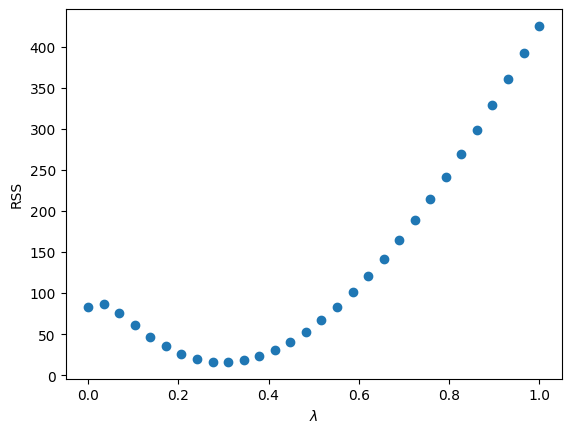

In [ ]:
fig, ax = plt.subplots()
ax.scatter(l_span, error_store)
ylabel('RSS')
xlabel(r'$\lambda$')
print('min of RSS in \u03bb is', min(error_store)) # \u03bb unicode lambda
print('optimal \u03bb is ', l_span[argmin(error_store)])
print(w4_store[argmin(error_store),:])